In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [2]:
from google.colab import files
uploaded = files.upload()

Saving bank-full.csv to bank-full.csv


In [3]:
dt = pd.read_csv('bank-full.csv')
dt.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#EDA

In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
dt['job'] = dt['job'].astype('category')
dt['marital'] = dt['marital'].astype('category')
dt['education'] = dt['education'].astype('category')
dt['default'] = dt['default'].astype('category')
dt['month'] = dt['month'].astype('category')
dt['housing'] = dt['housing'].astype('category')
dt['loan'] = dt['loan'].astype('category')
dt['contact'] = dt['contact'].astype('category')
dt['poutcome'] = dt['poutcome'].astype('category')
dt['y'] = dt['y'].astype('category')

In [6]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [7]:
dt.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
a=dt.columns
for i in a:
  print('\n',dt[i].value_counts())


 32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

 blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

 married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

 secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

 no     44396
yes      815
Name: default, dtype: int64

  0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: balance, Length: 7168, dtype: int64

 yes    25130
no     20081
Name: housing, dtype: int64

 no     37967
yes     7244
Name: loan

In [9]:
def un(x):
  dt[x] = dt[x].replace('unknown',0)

In [10]:
un('job')

In [11]:
un('education')

In [12]:
un('contact')

In [13]:
un('poutcome')

In [14]:
dt.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,0,5,may,261,1,-1,0,0,no
1,44,technician,single,secondary,no,29,yes,no,0,5,may,151,1,-1,0,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,0,5,may,76,1,-1,0,0,no
3,47,blue-collar,married,0,no,1506,yes,no,0,5,may,92,1,-1,0,0,no
4,33,0,single,0,no,1,no,no,0,5,may,198,1,-1,0,0,no


In [15]:
dt.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
0                 288
Name: job, dtype: int64

In [16]:
def fn(y):
    dt[y]=dt[y].replace('blue-collar',1)
    dt[y]=dt[y].replace('management',2)
    dt[y]=dt[y].replace('technician',3)
    dt[y]=dt[y].replace('admin.',4)
    dt[y]=dt[y].replace('services',5)
    dt[y]=dt[y].replace('retired',6)
    dt[y]=dt[y].replace('self-employed',7)
    dt[y]=dt[y].replace('entrepreneur',8)
    dt[y]=dt[y].replace('unemployed',9)
    dt[y]=dt[y].replace('housemaid',10)
    dt[y]=dt[y].replace('student',11)
    

In [17]:
fn('job')

In [18]:
dt.job.value_counts()

1     9732
2     9458
3     7597
4     5171
5     4154
6     2264
7     1579
8     1487
9     1303
10    1240
11     938
0      288
Name: job, dtype: int64

In [19]:
dt.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [20]:
def fn(i):
    dt[i]=dt[i].replace('married',1)
    dt[i]=dt[i].replace('single',2)
    dt[i]=dt[i].replace('divorced',3)

In [21]:
fn('marital')

In [22]:
dt.marital.value_counts()

1    27214
2    12790
3     5207
Name: marital, dtype: int64

In [23]:
dt.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
0             1857
Name: education, dtype: int64

In [24]:
def fn(j):
    dt[j]=dt[j].replace('secondary',1)
    dt[j]=dt[j].replace('tertiary',2)
    dt[j]=dt[j].replace('primary',3)

In [25]:
fn('education')

In [26]:
dt.education.value_counts()

1    23202
2    13301
3     6851
0     1857
Name: education, dtype: int64

In [27]:
dt.default.value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [28]:
def fn(k):
    dt[k]=dt[k].replace('no',1)
    dt[k]=dt[k].replace('yes',2)

In [29]:
fn('default')

In [30]:
dt.default.value_counts()

1    44396
2      815
Name: default, dtype: int64

In [31]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [32]:
dt.housing.value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [33]:
def fn(l):
    dt[l]=dt[l].replace('no',1)
    dt[l]=dt[l].replace('yes',2)

In [34]:
fn('housing')

In [35]:
dt.housing.value_counts()

2    25130
1    20081
Name: housing, dtype: int64

In [36]:
dt.loan.value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [37]:
def fn(m):
    dt[m]=dt[m].replace('no',1)
    dt[m]=dt[m].replace('yes',2)

In [38]:
fn('loan')

In [39]:
dt.loan.value_counts()

1    37967
2     7244
Name: loan, dtype: int64

In [40]:
dt.contact.value_counts()

cellular     29285
0            13020
telephone     2906
Name: contact, dtype: int64

In [41]:
def fn(n):
    dt[n]=dt[n].replace('cellular',1)
    dt[n]=dt[n].replace('telephone',2)

In [42]:
fn('contact')

In [43]:
dt.contact.value_counts()

1    29285
0    13020
2     2906
Name: contact, dtype: int64

In [44]:
dt.month.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [45]:
def fn(o):
    dt[o]=dt[o].replace('jan',1)
    dt[o]=dt[o].replace('feb',2)
    dt[o]=dt[o].replace('mar',3)
    dt[o]=dt[o].replace('apr',4)
    dt[o]=dt[o].replace('may',5)
    dt[o]=dt[o].replace('jun',6)
    dt[o]=dt[o].replace('jul',7)
    dt[o]=dt[o].replace('aug',8)
    dt[o]=dt[o].replace('sep',9)
    dt[o]=dt[o].replace('oct',10)
    dt[o]=dt[o].replace('nov',11)
    dt[o]=dt[o].replace('dec',12)

In [46]:
fn('month')

In [47]:
dt.month.value_counts()

5     13766
7      6895
8      6247
6      5341
11     3970
4      2932
2      2649
1      1403
10      738
9       579
3       477
12      214
Name: month, dtype: int64

In [48]:
dt.poutcome.value_counts()

0          36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [49]:
def fn(p):
    dt[p]=dt[p].replace('failure',1)
    dt[p]=dt[p].replace('success',2)
    dt[p]=dt[p].replace('other',3)

In [50]:
fn('poutcome')

In [51]:
dt.poutcome.value_counts()

0    36959
1     4901
3     1840
2     1511
Name: poutcome, dtype: int64

In [55]:
dt['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [56]:
def fn(q):
    dt[q]=dt[q].replace('no',0)
    dt[q]=dt[q].replace('yes',1)

In [57]:
fn('y')

In [59]:
dt.y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [63]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [62]:
a1 = dt.columns
a1

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [64]:
for i in a1:
  dt[i] = pd.to_numeric(dt[i],errors='coerce')

In [65]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  y          45211 non-null  int64
dtypes: int64(17)
memory usage: 5.9 MB


In [66]:
X = dt.drop('y',axis=1)
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,2,1,2,1,2143,2,1,0,5,5,261,1,-1,0,0
1,44,3,2,1,1,29,2,1,0,5,5,151,1,-1,0,0
2,33,8,1,1,1,2,2,2,0,5,5,76,1,-1,0,0
3,47,1,1,0,1,1506,2,1,0,5,5,92,1,-1,0,0
4,33,0,2,0,1,1,1,1,0,5,5,198,1,-1,0,0


In [68]:
Y=dt[['y']]
Y.head()

,y
0,0
1,0
2,0
3,0
4,0


#Building a Model

In [69]:
model = LogisticRegression()
model.fit(X,Y)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [81]:
y_pred = model.predict(X)
y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [82]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y,y_pred)
cm

array([[39123,   799],
       [ 4272,  1017]])

In [83]:
model.score(X,Y)

0.8878370308110858

In [85]:
from sklearn.metrics import classification_report
cr = classification_report(Y,y_pred)
print(cr) 

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.56      0.19      0.29      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.59      0.61     45211
weighted avg       0.86      0.89      0.86     45211



In [88]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

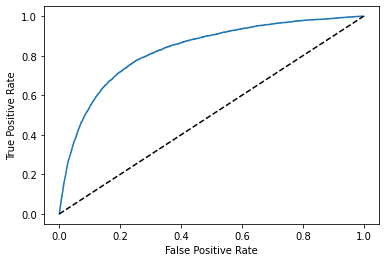

In [89]:
pre=model.predict(X)
fpr, tpr, thresholds = roc_curve(Y, model.predict_proba(X)[:,1])
auc=roc_auc_score(Y,pre)

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)')
plt.plot([0, 1], [0, 1],'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [90]:
print('auc:',np.round(auc,6))

auc: 0.586136
